In [116]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize
%matplotlib inline


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [117]:
json_file = pd.read_json('data/world_bank_projects.json')
json_file.head()
json_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

**1. Find the 10 countries with most projects**

In [118]:
#Since data already in a pandas df, select 'countryname' and apply .value_counts(). Slice out top 10.
json_file.countryname.value_counts()[:10]


Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

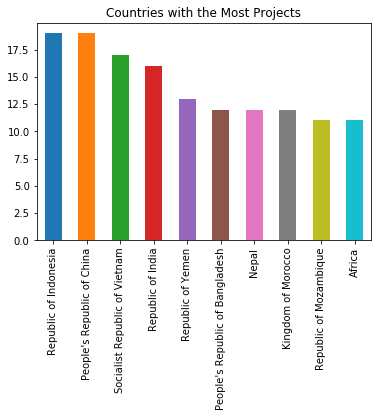

In [119]:
#Plot the top 10 data
countryname = json_file.countryname.value_counts()[:10]
countryname.plot(kind='bar', title='Countries with the Most Projects', y='number of projects', x='country')
plt.show()

In [120]:
#From observation of entries containing empty stings below, check to make sure the data above is complete
#if no rows returned, above numbers are OK
json_file[json_file.countryname == '']

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url


**2. Find the top 10 major project themes (using column 'mjtheme_namecode')**

In [121]:
#read from json file, apply json_normalize to flatten column of interest, then count resulting dataframe as before
json_data = json.load(open('data/world_bank_projects.json'))
new_json_file = json_normalize(json_data, 'mjtheme_namecode')
new_json_file.name.value_counts()[:10]

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [122]:
#LLooks like data missing from the name columns. Look at code column. Compare numbers with above. 
#If all values are larger, there must be empty strings throughout, not just in #7.
new_json_file.code.value_counts()[:10]

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

Even though there appears to be no missing values when applying the json_file.info() method above, there appears to be empty strings in the name column. This is a good lesson. Will definitely remember this in the future.

***3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.***

In [123]:
new_json_file.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [124]:
#Want a dictionary that contains complete code/name pairs.
#1 .sort_values with  na_position='first' to put all empty strings at the start, so they will be overwritten with correct values
#2 set the index to 'code' and create a dictionary containing that and the corresponding 'name' field
complete_dict = new_json_file.sort_values('name', na_position='first').set_index('code')['name'].to_dict()
complete_dict

{'8': 'Human development',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '4': 'Financial and private sector development',
 '7': 'Social dev/gender/inclusion',
 '2': 'Public sector governance',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '3': 'Rule of law',
 '9': 'Urban development',
 '1': 'Economic management'}

In [125]:
#Use the completed dictionary of code/name mappings to map name values to corresponding codes. Strip out empty strings first.
new_json_file.loc[new_json_file['name'].str.strip() == '', 'name'] = new_json_file['code'].map(complete_dict)
new_json_file.head()

,code,name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [126]:
#rerun our earlier query on the completed data frame
new_json_file.name.value_counts()[:10]

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

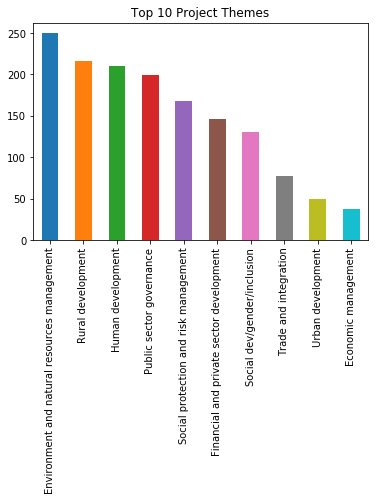

In [127]:
#plot above data
top_ten_themes = new_json_file.name.value_counts()[:10]
top_ten_themes.plot(kind='bar', title='Top 10 Project Themes')
plt.show()